In [57]:
import numpy as np
import matplotlib.pyplot as plt

decaytxt = np.loadtxt('Ridgecrest2_mean_displacement_decay.txt',delimiter=',') # from Matlab output
x = decaytxt[:,0] # fault-perpendicular distance in meters
disp = decaytxt[:,1] # feature density at a given distance (per sqm)
d1 = np.loadtxt('Ridgecrest2_best_fit_parameters_displacement_1.txt')
d10 = np.loadtxt('Ridgecrest2_best_fit_parameters_displacement_10.txt')
dc = np.loadtxt('Ridgecrest2_best_fit_parameters_displacement_c.txt')


In [58]:
def model(x,B,c,n):
    return B * (((x+c)/c))**-n

In [59]:
model1_sc = model(x,d1[0],1,d1[2])
model10_sc = model(x,d10[0],10,d10[2])
modelc_sc = model(x,dc[0],dc[1],dc[2])

xcont = np.logspace(0,np.log10(max(x)),1000)
model1 = model(xcont,d1[0],1,d1[2])
model10 = model(xcont,d10[0],10,d10[2])
modelc = model(xcont,dc[0],dc[1],dc[2])

res1 = np.abs(disp-model1_sc)
resc = np.abs(disp-modelc_sc)
res10 = np.abs(disp-model10_sc)

/var/folders/bz/nkz6kfcs105818grwmfk71jw0000gn/T/ipykernel_42841/1138703400.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


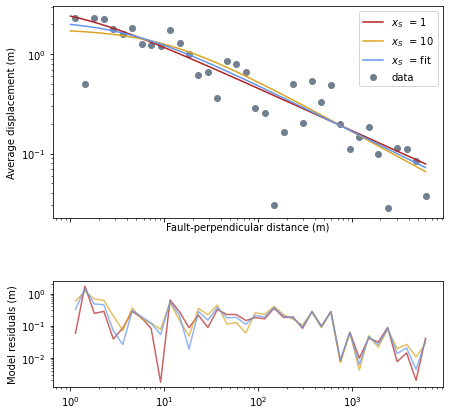

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex = True,
                       gridspec_kw={
                           'height_ratios': [3, 1.5],
                       'wspace': 0.4,
                       'hspace': 0.4})

ax[0].scatter(x,disp,c='slategrey',label='data')
ax[0].plot(xcont,model1,c='firebrick',label='$x_{S}$  = 1')
ax[0].plot(xcont,model10,c='goldenrod',label='$x_{S}$  = 10')
ax[0].plot(xcont,modelc,c='cornflowerblue',label='$x_{S}$  = fit')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend()
ax[1].plot(x,res1,c='firebrick',alpha=0.7,label='$x_{S}$ = 1')
ax[1].plot(x,res10,c='goldenrod',alpha=0.7,label='$x_{S}$  = 10')
ax[1].plot(x,resc,c='cornflowerblue',alpha=0.7,label='$x_{S}$ = fit')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set_ylabel('Average displacement (m)')
ax[1].set_ylabel('Model residuals (m)')
ax[0].set_xlabel('Fault-perpendicular distance (m)')

plt.tight_layout()
plt.show()